In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [235]:
file = 'KR_agg_MethSeizure.xlsx'
o_df = pd.read_excel(file)

In [236]:
df = o_df.copy()
display(df.head())
display(df.info())

,date,agg_seizure
0,200102,5830.0
1,200103,9865.0
2,200104,13501.0
3,200105,55646.0
4,200106,58619.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         293 non-null    int64  
 1   agg_seizure  293 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.7 KB


None

## **할 작업**
1. date컬럼 datetime 자료형으로 바꾸기
2. agg_seizure 이상치 있는지 점검(그래프로 그려보기)
3. agg_seizure 모든 데이터 round하기
4. agg_seizure 연별 변화량 추출한 seizure 컬럼 생성  
4-1. 데이터 연간으로 나누기  
4-2. 연간 데이터 변화량 추출  
4-3. 나눈 데이터 다시 합치기

### 1.

In [237]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m')
# df = df.set_index(df['date']).drop(columns=['date'])

In [238]:
df

,date,agg_seizure
0,2001-02-01,5830.00
1,2001-03-01,9865.00
2,2001-04-01,13501.00
3,2001-05-01,55646.00
4,2001-06-01,58619.00
...,...,...
288,2025-02-01,55811.96
289,2025-03-01,71506.80
290,2025-04-01,105160.03
291,2025-05-01,108505.71


### 2.

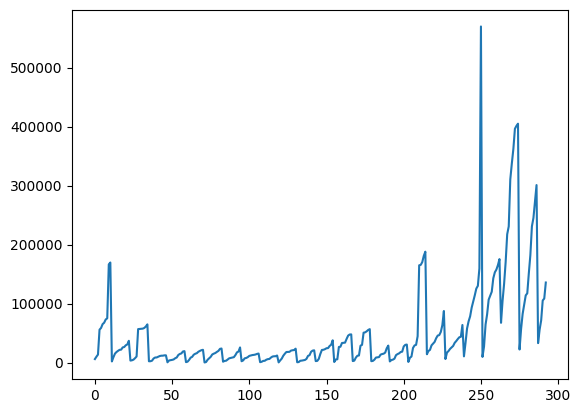

In [239]:
plt.plot(df['agg_seizure'])
plt.show()

### 3.

In [240]:
a = df['agg_seizure'].round()

In [241]:
a

0        5830.0
1        9865.0
2       13501.0
3       55646.0
4       58619.0
         ...   
288     55812.0
289     71507.0
290    105160.0
291    108506.0
292    135657.0
Name: agg_seizure, Length: 293, dtype: float64

In [242]:
# 홍콩 데이터는 int인지 float인지 확인: int임.

In [243]:
b = pd.read_csv('HK External Merchandise Trade Statistics - Total Exports to Ten Main Destinations_test.csv')

In [244]:
b

,Year,Month,Korea,Korea_change,All destinations,All destinations_change
0,1972,NaN,179,N.A.,19400,13
1,1973,NaN,383,113.9,25999,34
2,1974,NaN,373,-2.7,30036,15.5
3,1975,NaN,328,-11.9,29832,-0.7
4,1976,NaN,476,44.9,41557,39.3
...,...,...,...,...,...,...
690,2025,Feb,4885,-9.3,327909,15.4
691,2025,Mar,5200,-22.8,455534,18.5
692,2025,Apr,4843,-26.7,434464,14.7
693,2025,May,4672,-25.6,434081,15.5


In [245]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     695 non-null    int64 
 1   Month                    642 non-null    object
 2   Korea                    695 non-null    int64 
 3   Korea_change             695 non-null    object
 4   All destinations         695 non-null    int64 
 5   All destinations_change  695 non-null    object
dtypes: int64(3), object(3)
memory usage: 32.7+ KB


In [246]:
df['agg_seizure'] = df['agg_seizure'].round().astype(int)

In [247]:
df

,date,agg_seizure
0,2001-02-01,5830
1,2001-03-01,9865
2,2001-04-01,13501
3,2001-05-01,55646
4,2001-06-01,58619
...,...,...
288,2025-02-01,55812
289,2025-03-01,71507
290,2025-04-01,105160
291,2025-05-01,108506


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         293 non-null    datetime64[ns]
 1   agg_seizure  293 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.7 KB


### 4. agg_seizure 연별 변화량 추출한 seizure 컬럼 생성
4-2. 연간 데이터 변화량 추출  
4-3. 나눈 데이터 다시 합치기

#### 4-1. 데이터 연간으로 나누기

In [249]:
df.loc[df['date']=='2001-02-01']

,date,agg_seizure
0,2001-02-01,5830


In [250]:
#2001-2025 연별 데이터 만들기
yby = []

for i in range(1, 26) :
    year = str(i+2000)
    yby.append(df.loc[df['date'].astype(str).str.contains(year)])

In [251]:
yby[0]

,date,agg_seizure
0,2001-02-01,5830
1,2001-03-01,9865
2,2001-04-01,13501
3,2001-05-01,55646
4,2001-06-01,58619
5,2001-07-01,65066
6,2001-08-01,67490
7,2001-09-01,72933
8,2001-10-01,74970
9,2001-11-01,166425


In [252]:
yby[1]

,date,agg_seizure
11,2002-01-01,1793
12,2002-02-01,8932
13,2002-03-01,15053
14,2002-04-01,17813
15,2002-05-01,19801
16,2002-06-01,21505
17,2002-07-01,21804
18,2002-08-01,25604
19,2002-09-01,26270
20,2002-10-01,29231


In [253]:
yby[2]

,date,agg_seizure
23,2003-01-01,3269
24,2003-02-01,3756
25,2003-03-01,4869
26,2003-04-01,7304
27,2003-05-01,10206
28,2003-06-01,56639
29,2003-07-01,56925
30,2003-08-01,57243
31,2003-09-01,57457
32,2003-10-01,58597


In [254]:
yby[24]

,date,agg_seizure
287,2025-01-01,32883
288,2025-02-01,55812
289,2025-03-01,71507
290,2025-04-01,105160
291,2025-05-01,108506
292,2025-06-01,135657


#### 4-2. 연간 변화량 추출

In [255]:
yby[0]['agg_seizure'].diff()

0         NaN
1      4035.0
2      3636.0
3     42145.0
4      2973.0
5      6447.0
6      2424.0
7      5443.0
8      2037.0
9     91455.0
10     3137.0
Name: agg_seizure, dtype: float64

In [ ]:
for i in yby :
    i['seizure'] = i['agg_seizure'].diff()
    i['seizure'].iloc[0] = i['agg_seizure'].iloc[0]

In [257]:
yby[0]

,date,agg_seizure,seizure
0,2001-02-01,5830,5830.0
1,2001-03-01,9865,4035.0
2,2001-04-01,13501,3636.0
3,2001-05-01,55646,42145.0
4,2001-06-01,58619,2973.0
5,2001-07-01,65066,6447.0
6,2001-08-01,67490,2424.0
7,2001-09-01,72933,5443.0
8,2001-10-01,74970,2037.0
9,2001-11-01,166425,91455.0


In [258]:
yby[1]

,date,agg_seizure,seizure
11,2002-01-01,1793,1793.0
12,2002-02-01,8932,7139.0
13,2002-03-01,15053,6121.0
14,2002-04-01,17813,2760.0
15,2002-05-01,19801,1988.0
16,2002-06-01,21505,1704.0
17,2002-07-01,21804,299.0
18,2002-08-01,25604,3800.0
19,2002-09-01,26270,666.0
20,2002-10-01,29231,2961.0


In [259]:
yby[24]

,date,agg_seizure,seizure
287,2025-01-01,32883,32883.0
288,2025-02-01,55812,22929.0
289,2025-03-01,71507,15695.0
290,2025-04-01,105160,33653.0
291,2025-05-01,108506,3346.0
292,2025-06-01,135657,27151.0


#### 4-3. 데이터 다시 합치기

In [260]:
yby

[         date  agg_seizure  seizure
 0  2001-02-01         5830   5830.0
 1  2001-03-01         9865   4035.0
 2  2001-04-01        13501   3636.0
 3  2001-05-01        55646  42145.0
 4  2001-06-01        58619   2973.0
 5  2001-07-01        65066   6447.0
 6  2001-08-01        67490   2424.0
 7  2001-09-01        72933   5443.0
 8  2001-10-01        74970   2037.0
 9  2001-11-01       166425  91455.0
 10 2001-12-01       169562   3137.0,
          date  agg_seizure  seizure
 11 2002-01-01         1793   1793.0
 12 2002-02-01         8932   7139.0
 13 2002-03-01        15053   6121.0
 14 2002-04-01        17813   2760.0
 15 2002-05-01        19801   1988.0
 16 2002-06-01        21505   1704.0
 17 2002-07-01        21804    299.0
 18 2002-08-01        25604   3800.0
 19 2002-09-01        26270    666.0
 20 2002-10-01        29231   2961.0
 21 2002-11-01        30662   1431.0
 22 2002-12-01        36817   6155.0,
          date  agg_seizure  seizure
 23 2003-01-01         3269   3269.0

In [261]:
seizure = pd.DataFrame()

for i in yby :
    seizure = pd.concat([seizure, i['seizure']])

In [262]:
seizure

,seizure
0,5830.0
1,4035.0
2,3636.0
3,42145.0
4,2973.0
...,...
288,22929.0
289,15695.0
290,33653.0
291,3346.0


In [263]:
yby[24].loc[292]

date           2025-06-01 00:00:00
agg_seizure                 135657
seizure                    27151.0
Name: 292, dtype: object

In [264]:
yby[24].loc[288]

date           2025-02-01 00:00:00
agg_seizure                  55812
seizure                    22929.0
Name: 288, dtype: object

In [265]:
yby[10].loc[123]['seizure'] == seizure.loc[123]

seizure    True
Name: 123, dtype: bool

In [266]:
df['seizure'] = seizure

In [267]:
df

,date,agg_seizure,seizure
0,2001-02-01,5830,5830.0
1,2001-03-01,9865,4035.0
2,2001-04-01,13501,3636.0
3,2001-05-01,55646,42145.0
4,2001-06-01,58619,2973.0
...,...,...,...
288,2025-02-01,55812,22929.0
289,2025-03-01,71507,15695.0
290,2025-04-01,105160,33653.0
291,2025-05-01,108506,3346.0


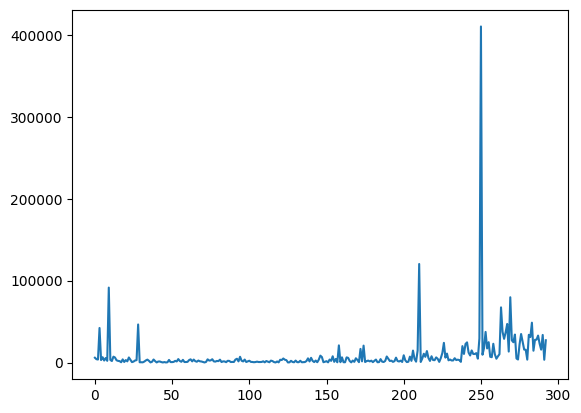

In [268]:
plt.plot(df['seizure'])
plt.show()

## 저장

In [269]:
df

,date,agg_seizure,seizure
0,2001-02-01,5830,5830.0
1,2001-03-01,9865,4035.0
2,2001-04-01,13501,3636.0
3,2001-05-01,55646,42145.0
4,2001-06-01,58619,2973.0
...,...,...,...
288,2025-02-01,55812,22929.0
289,2025-03-01,71507,15695.0
290,2025-04-01,105160,33653.0
291,2025-05-01,108506,3346.0


In [270]:
df_save = df.drop(columns=['agg_seizure'])
df_save

,date,seizure
0,2001-02-01,5830.0
1,2001-03-01,4035.0
2,2001-04-01,3636.0
3,2001-05-01,42145.0
4,2001-06-01,2973.0
...,...,...
288,2025-02-01,22929.0
289,2025-03-01,15695.0
290,2025-04-01,33653.0
291,2025-05-01,3346.0


In [271]:
df_save.to_csv('KR_MethSeizure_preprocessed.csv')

In [ ]:
df_save.to_csv('KR_MethSeizure_preprocessed.csv', index=False)